In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/IDEA-Research/DINO.git
%cd DINO

Cloning into 'DINO'...
remote: Enumerating objects: 442, done.
remote: Counting objects: 100% (196/196), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 442 (delta 136), reused 95 (delta 95), pack-reused 246 (from 1)
Receiving objects: 100% (442/442), 13.43 MiB | 13.98 MiB/s, done.
Resolving deltas: 100% (191/191), done.
/content/DINO


In [ ]:
!pip install -r requirements.txt

  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-install-0_tby0j5/pycocotools_4b1b1759dabe4ebaa45415ae1ab4cc86
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/cocoapi.git /tmp/pip-install-0_tby0j5/pycocotools_4b1b1759dabe4ebaa45415ae1ab4cc86
  Resolved https://github.com/cocodataset/cocoapi.git to commit 8c9bcc3cf640524c4c20a9c40e89cb6a2f2fa0e9
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/cocodataset/panopticapi.git to /tmp/pip-install-0_tby0j5/panopticapi_82d1ae214f934867923537105a9571f3
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/panopticapi.git /tmp/pip-install-0_tby0j5/panopticapi_82d1ae214f934867923537105a9571f3
  Resolved https://github.com/cocodataset/panopticapi.git to commit 7bb4655548f98f3fedc07bf37e9040a992b054b0
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

In [ ]:
%cd models/dino/ops
!python setup.py build install
# unit test (should see all checking is True)
!python test.py
!cd ../../..

/content/DINO/models/dino/ops


In [ ]:
import os, sys
import torch, json
import numpy as np

In [ ]:
import sys
sys.path.append('/content/DINO')

In [ ]:
from main import build_model_main
from util.slconfig import SLConfig
from datasets import build_dataset
from util.visualizer import COCOVisualizer
from util import box_ops

In [ ]:
model_config_path = "/content/DINO/config/DINO/DINO_4scale.py" # change the path of the model config file
model_checkpoint_path = "/content/drive/MyDrive/checkpoint0033_4scale.pth" # change the path of the model checkpoint
# See our Model Zoo section in README.md for more details about our pretrained models.

In [ ]:
args = SLConfig.fromfile(model_config_path)
args.device = 'cuda'
model, criterion, postprocessors = build_model_main(args)
checkpoint = torch.load(model_checkpoint_path, map_location='cpu')
model.load_state_dict(checkpoint['model'])
_ = model.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 92.4MB/s]
<ipython-input-20-72ca36f16c8d>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is poss

In [ ]:
/usr/local/lib/python3.10/dist-packages/MultiScaleDeformableAttention-1.0-py3.10-linux-x86_64.egg/MultiScaleDeformableAttention.py

In [ ]:
!git clone https://github.com/fundamentalvision/Deformable-DETR.git

Cloning into 'Deformable-DETR'...
remote: Enumerating objects: 98, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 98 (delta 27), reused 25 (delta 25), pack-reused 37 (from 1)
Receiving objects: 100% (98/98), 383.50 KiB | 19.17 MiB/s, done.
Resolving deltas: 100% (31/31), done.


In [ ]:
%cd Deformable-DETR/models/ops

/content/DINO/models/dino/ops/Deformable-DETR/models/ops


In [ ]:
!pip install .

Processing /content/DINO/models/dino/ops/Deformable-DETR/models/ops
  Preparing metadata (setup.py) ... done
  Created wheel for MultiScaleDeformableAttention: filename=MultiScaleDeformableAttention-1.0-cp310-cp310-linux_x86_64.whl size=2951625 sha256=c9c9e62f473b7a8a2b73aad25dd9be754421c22079cd84acbabd983cef3e4dc9
  Stored in directory: /tmp/pip-ephem-wheel-cache-u5_fou57/wheels/bf/a5/8d/1b5ef285071742c12cb24b6529b8ae1b5db382230a3eda33fa
Successfully built MultiScaleDeformableAttention
  Attempting uninstall: MultiScaleDeformableAttention
    Found existing installation: MultiScaleDeformableAttention 1.0
    Uninstalling MultiScaleDeformableAttention-1.0:
      Successfully uninstalled MultiScaleDeformableAttention-1.0


In [ ]:
# # load coco names
# #with open('/content/random_sample_mavi_2_gt.json') as f:
#  #   id2name = json.load(f)
#   #  dic = {}
#     for line in id2name['images']:
#       dic[line['id']] = line['file_name']
#     # id2name = {
#     print(id2name)
#     print(dic)
#     #id2name = {int(k):v for k,v in id2name.items()}

{'images': [{'height': 480, 'width': 640, 'id': 1, 'file_name': '1229.jpg'}, {'height': 480, 'width': 640, 'id': 2, 'file_name': '1234.jpg'}, {'height': 480, 'width': 640, 'id': 3, 'file_name': '1254.jpg'}, {'height': 480, 'width': 640, 'id': 4, 'file_name': '1287.jpg'}, {'height': 480, 'width': 640, 'id': 5, 'file_name': '1292.jpg'}, {'height': 480, 'width': 640, 'id': 6, 'file_name': '1298.jpg'}, {'height': 480, 'width': 640, 'id': 7, 'file_name': '1313.jpg'}, {'height': 480, 'width': 640, 'id': 8, 'file_name': '1335.jpg'}, {'height': 480, 'width': 640, 'id': 9, 'file_name': '1898.jpg'}, {'height': 480, 'width': 640, 'id': 10, 'file_name': '1901.jpg'}, {'height': 480, 'width': 640, 'id': 11, 'file_name': '1904.jpg'}, {'height': 480, 'width': 640, 'id': 12, 'file_name': '1960.jpg'}, {'height': 480, 'width': 640, 'id': 13, 'file_name': '1997.jpg'}, {'height': 480, 'width': 640, 'id': 14, 'file_name': '3237.jpg'}, {'height': 480, 'width': 640, 'id': 15, 'file_name': '3276.jpg'}, {'heigh

In [ ]:
from PIL import Image
import datasets.transforms as T

In [ ]:
image = Image.open('/content/download.jpeg').convert("RGB") # load image

In [ ]:
# transform images
transform = T.Compose([
    T.RandomResize([800], max_size=1333),
    T.ToTensor(),
    T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
image, _ = transform(image, None)

In [ ]:
# predict images
output = model.cuda()(image[None].cuda())
output = postprocessors['bbox'](output, torch.Tensor([[1.0, 1.0]]).cuda())[0]

/usr/local/lib/python3.10/dist-packages/torch/functional.py:513: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3609.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


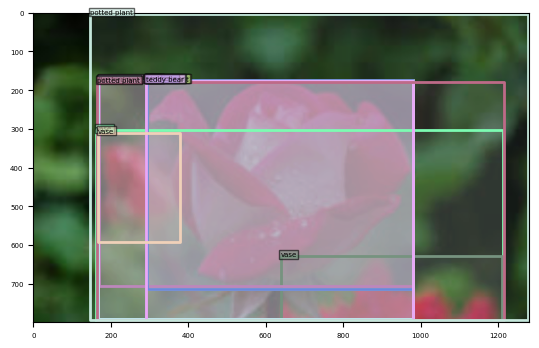

In [ ]:
# visualize outputs
thershold = 0.1 # set a thershold

vslzr = COCOVisualizer()

scores = output['scores']
labels = output['labels']
boxes = box_ops.box_xyxy_to_cxcywh(output['boxes'])
select_mask = scores > thershold

box_label = [id2name[int(item)] for item in labels[select_mask]]
pred_dict = {
    'boxes': boxes[select_mask],
    'size': torch.Tensor([image.shape[1], image.shape[2]]),
    'box_label': box_label
}
vslzr.visualize(image, pred_dict, savedir=None, dpi=100)

In [53]:
import torch
from PIL import Image
import datasets.transforms as T
from pathlib import Path

def process_images(image_folder, model, postprocessors, id2name, threshold=0.1, num_images=60):
    # Set up transforms
    transform = T.Compose([
        T.RandomResize([800], max_size=1333),
        T.ToTensor(),
        T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

    # Set up visualizer
    vslzr = COCOVisualizer()

    # Get list of image files (including '._' files)
    image_files = list(Path(image_folder).glob('._*'))
    image_files = image_files[:num_images]  # Limit to specified number of images

    for img_path in image_files:
        try:
            # Attempt to open the '._' file directly
            with open(img_path, 'rb') as f:
                # Skip the first 4096 bytes (AppleDouble header)
                f.seek(4096)
                image = Image.open(f)

            # If successful, proceed with processing
            image = image.convert("RGB")
            image_tensor, _ = transform(image, None)

            # Predict
            with torch.no_grad():
                output = model.cuda()(image_tensor[None].cuda())
                output = postprocessors['bbox'](output, torch.Tensor([[1.0, 1.0]]).cuda())[0]

            # Process output
            scores = output['scores']
            labels = output['labels']
            boxes = box_ops.box_xyxy_to_cxcywh(output['boxes'])
            select_mask = scores > threshold

            box_label = [id2name[int(item)] for item in labels[select_mask]]
            pred_dict = {
                'boxes': boxes[select_mask],
                'size': torch.Tensor([image_tensor.shape[1], image_tensor.shape[2]]),
                'box_label': box_label
            }

            # Visualize
            output_path = img_path.parent / f"{img_path.stem[2:]}_prediction.png"  # Remove '._' from filename
            vslzr.visualize(image_tensor, pred_dict, savedir=str(output_path), dpi=100)

            print(f"Processed and saved prediction for {img_path.name}")

        except Exception as e:
            print(f"Error processing {img_path.name}: {str(e)}")



# Load your id2name mapping
with open("/content/drive/MyDrive/random_sample_mavi_2_gt (1).json") as f:
    data = json.load(f)
    id2name = {item['id']: item['file_name'] for item in data['images']}


# Folder containing your images
image_folder = '/content/drive/MyDrive/Pedestrian_dataset_for_internship_assignment'

# Process images
process_images(image_folder, model, postprocessors, id2name)

Error processing ._13547.jpg: cannot identify image file <_io.BufferedReader name='/content/drive/MyDrive/Pedestrian_dataset_for_internship_assignment/._13547.jpg'>
Error processing ._13526.jpg: cannot identify image file <_io.BufferedReader name='/content/drive/MyDrive/Pedestrian_dataset_for_internship_assignment/._13526.jpg'>
Error processing ._1335.jpg: cannot identify image file <_io.BufferedReader name='/content/drive/MyDrive/Pedestrian_dataset_for_internship_assignment/._1335.jpg'>
Error processing ._13187.jpg: cannot identify image file <_io.BufferedReader name='/content/drive/MyDrive/Pedestrian_dataset_for_internship_assignment/._13187.jpg'>
Error processing ._13518.jpg: cannot identify image file <_io.BufferedReader name='/content/drive/MyDrive/Pedestrian_dataset_for_internship_assignment/._13518.jpg'>
Error processing ._13199.jpg: cannot identify image file <_io.BufferedReader name='/content/drive/MyDrive/Pedestrian_dataset_for_internship_assignment/._13199.jpg'>
Error proces